## Jacob Sycoff

# **Project 1: Query Project**

## **Part 1: Querying Data with BigQuery**

#### **Assignment for part 1:**
Some initial queries

Paste your SQL query and answer the question in a sentence. Be sure you properly format your queries and results using markdown.

###### **1. What's the size of this dataset? (i.e., how many trips).**

    Answer: 
    983,648 rows (trips). This does includes any dirty data, as the data is not yet cleaned.  In reality, the number of real trips taken is likely lower
        
    
    SQL prefaces: 
        Note that I made a view of the whole tables so that they are easier to type out in queries. They have the same names, but are in my bike_trip_data private dataset instead. The names are bike_trip_data.bikeshare_stations, bike_trip_data.bikeshare_trips, and bike_trip_data.bikeshare_status.  
    
    SQL query: 
```sql
        SELECT COUNT(*)
        FROM `bike_trip_data.bikeshare_trips` 
```


###### **2. What is the earliest start date and time and latest end date and time for a trip?**
    
    Answer: 
        The earliest start date and time is 2013-08-29 09:08:00 PST
        The latest start date and time is 2016-08-31 23:48:00 PST


    SQL query: 
```sql
        SELECT MIN(start_date), MAX(end_date)
        FROM `bike_trip_data.bikeshare_trips`;
```

###### **3. How many bikes are there?**

    Note: This answer is slightly more complicated than it seems it would be because the number of bikes changed over time, and because we are using the static dataset, I cannot get current data. I will therefore give the number of bikes on the earliest and latest dates in the dataset. I will make the (sometimes false) assumption that it does not matter what time on that day I look at (that the number of bikes remains constant throughout the day).
    
    
    Answer: 
        Earliest date (08/29/2013): 1140 total bikes
        Latest Date (08/31/2016): 1390 total bikes
        
        


    SQL query 1: 
```sql
        SELECT SUM(total_bikes)
        FROM (SELECT DISTINCT station_id, total_bikes
              FROM (SELECT station_id, docks_available, bikes_available, time as date, 
                      (docks_available + bikes_available) as total_bikes
                    FROM `bike_trip_data.bikeshare_status`
                    WHERE DATE(time) = '2013-08-29') AS bikes_on_date) AS distinct_station_bikes_on_date;
```
    SQL query 2: 
```sql
        SELECT SUM(total_bikes)
        FROM (SELECT DISTINCT station_id, total_bikes
              FROM (SELECT station_id, docks_available, bikes_available, time as date, 
                      (docks_available + bikes_available) as total_bikes
                    FROM `bike_trip_data.bikeshare_status`
                    WHERE DATE(time) = '2016-08-31') AS bikes_on_date) AS distinct_station_bikes_on_date;
```

#### **Questions of your own**

    Make up 3 questions and answer them using the Bay Area Bike Share Trips Data. These questions MUST be different than any of the questions and queries you ran above.

###### **Question 1: What is the average number of docks per station?**
    
        Answer: About 18
        
        SQL query:
```sql        
            SELECT AVG(dockcount)
            FROM bike_trip_data.bikeshare_stations;
```
###### **Question 2:  In what year were the most docks installed?**
    
        Answer: 2013
        
        SQL query:
```sql        
            SELECT year
            FROM (SELECT COUNT(station_id) as num_stations, EXTRACT(YEAR FROM installation_date) AS year
                  FROM bike_trip_data.bikeshare_stations
                  GROUP BY year)
            ORDER BY num_stations DESC
            lIMIT 1;
```


###### **Question 3: Which month has the highest aggregate number of trips over the entire time period in the data?**
        
        Answer: August
        
        SQL query:
```sql        
            SELECT month
            FROM (SELECT COUNT(trip_id) as num_trips, EXTRACT(MONTH FROM start_date) AS month
                FROM bike_trip_data.bikeshare_trips
                GROUP BY month)
            ORDER BY num_trips DESC
            LIMIT 1
```

## **Part 2 - Querying data from the BigQuery CLI**

    Use BQ from the Linux command line:

        General query structure
```bash
        bq query --use_legacy_sql=false '
            SELECT count(*)
            FROM
               `bigquery-public-data.san_francisco.bikeshare_trips`'
```

Queries
#### **1. Rerun the first 3 queries from Part 1 using bq command line tool (Paste your bq queries and results here, using properly formatted markdown):**

What's the size of this dataset? (i.e., how many trips)

    Query:
```bash    
        $ bq query --use_legacy_sql=false '
            SELECT COUNT(*)
            FROM `bike_trip_data.bikeshare_trips` '
```            
    Result:
```bash

            +--------+
            |  f0_   |
            +--------+
            | 983648 |
            +--------+
``` 

What is the earliest start time and latest end time for a trip?

    Query:
```bash    
        bq query --use_legacy_sql=false '
            SELECT MIN(start_date), MAX(end_date)
            FROM `bike_trip_data.bikeshare_trips`; '
```            
    Result:
```bash        
 
        +---------------------+---------------------+
        |         f0_         |         f1_         |
        +---------------------+---------------------+
        | 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
        +---------------------+---------------------+
```    

How many bikes are there?

    Note: I will show the number of bikes during the last day included in the dataset.
    

        
    Query:
```bash    
       bq query --use_legacy_sql=false '
         SELECT SUM(total_bikes)
         FROM (SELECT DISTINCT station_id, total_bikes
               FROM (SELECT station_id, docks_available, bikes_available, time as date, 
                       (docks_available + bikes_available) as total_bikes
                     FROM `bike_trip_data.bikeshare_status`
                     WHERE DATE(time) = "2016-08-31") AS bikes_on_date) AS distinct_station_bikes_on_date; '
        
        
        
        
    Result:
    
        +------+
        | f0_  |
        +------+
        | 1390 |
        +------+
    
            

    New Query (Run using bq and paste your SQL query and answer the question in a sentence, using properly formatted markdown):

    How many trips are in the morning vs in the afternoon?
        
        Note: 
            Here, I will determine the number of trips in the morning (0:00 - 12:00) and the number of tripS in the afternoon (12:00p - 23:59) on average per day.
            
        Query:
```bash      
            bq query --use_legacy_sql=false '
                SELECT morning_trips/total_days as avg_morning_trips_per_day, afternoon_trips/total_days as
                        avg_afternoon_trips_per_day
                FROM (SELECT COUNT(*) as morning_trips
                       FROM bike_trip_data.bikeshare_trips
                       WHERE (TIME(start_date) < "12:00:00")),
       
                       (SELECT COUNT(*) as afternoon_trips
                       FROM bike_trip_data.bikeshare_trips
                       WHERE (TIME(start_date) >= "12:00:00")),      
       
                       (SELECT COUNT(*) AS total_days
                        FROM (SELECT DISTINCT DATE(start_date)
                              FROM bike_trip_data.bikeshare_trips))
```
                              
        Result:
        
```bash        
            +---------------------------+-----------------------------+
            | avg_morning_trips_per_day | avg_afternoon_trips_per_day |
            +---------------------------+-----------------------------+
            |        375.19472247497725 |           519.8444040036396 |
            +---------------------------+-----------------------------+
```

Project Questions

Identify the main questions you'll need to answer to make recommendations (list below, add as many questions as you need).

Note: not all of these questions will necessarily be answered, nor is this an exhasutive list of questions that will be explored

    Question 1: What are the top stations for bike rentals in the most recent full calandar year?

    Question 2: What are the top areas/locations for bike rentals?
 
    Question 3: What times are bikes most likely to sit idle?

    Question 4: During what times are commuter trips most likely?

    Question 5: What categories of stations had high usership (>= average usership for a station) within 2 weeks/one month of installation.

    Question 6: What are the top 10 most popular trips?

    Question 7: What stations have the highest number of bikes sitting idle during commuter hours?
    
    Question 8: What stations have the highest number of bikes sitting idle during tourist hours?

    Question 9: What stations have declined in popularity?
    
    Question 10: What are the top stations by monthly average trips?
    
    Question 11: What are the top trips per month?
    
    Question 12: What are the top non-commuter trips? 
    

    
### **Answers**

#### **Answer at least 4 of the questions you identified above You can use either BigQuery or the bq command line tool. Paste your questions, queries and answers below.**

##### ***Question 1: What are the top 10 start stations for bike rentals in the most recent full calandar year?***
        Answer:
```bash
            +-----------------------------------------------+------------------------------+
            |              start_station_name               | num_trips_begun_here_in_2015 |
            +-----------------------------------------------+------------------------------+
            | San Francisco Caltrain (Townsend at 4th)      |                        24827 |
            | San Francisco Caltrain 2 (330 Townsend)       |                        22274 |
            | Harry Bridges Plaza (Ferry Building)          |                        17344 |
            | Temporary Transbay Terminal (Howard at Beale) |                        14668 |
            | Steuart at Market                             |                        14577 |
            | Embarcadero at Sansome                        |                        14352 |
            | 2nd at Townsend                               |                        13762 |
            | Townsend at 7th                               |                        13695 |
            | Market at Sansome                             |                        11301 |
            | Market at 10th                                |                        11049 |
            +-----------------------------------------------+------------------------------+
```

 
        View: better_trips:
        
```sql
       SELECT *
       FROM(SELECT *, duration_sec/60 as duration_min, EXTRACT(YEAR FROM start_date) AS year, 
                EXTRACT(MONTH FROM start_date) AS month, EXTRACT(DAY FROM start_date) AS day, EXTRACT(TIME FROM start_date) AS time, 
                EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week,
      FROM bike_trip_data.bikeshare_trips)
```
        SQL query:
```sql
            SELECT start_station_name, COUNT(start_station_name) as num_trips_begun_here_in_2015
            FROM (SELECT *
                  FROM bike_trip_data.better_trips
                  WHERE (year = 2015))
            GROUP BY start_station_name
            ORDER BY num_trips_begun_here_in_2015 DESC
            LIMIT 10;
```    

##### ***Question 2: What are the top 10 end stations for bike rentals in the most recent full calandar year?***

        Answer:
```bash       
            +-----------------------------------------------+------------------------------+
            |               end_station_name                | num_trips_ended_here_in_2015 |
            +-----------------------------------------------+------------------------------+
            | San Francisco Caltrain (Townsend at 4th)      |                        32496 |
            | San Francisco Caltrain 2 (330 Townsend)       |                        23782 |
            | Harry Bridges Plaza (Ferry Building)          |                        17709 |
            | Embarcadero at Sansome                        |                        16589 |
            | 2nd at Townsend                               |                        15131 |
            | Townsend at 7th                               |                        15088 |
            | Steuart at Market                             |                        14634 |
            | Market at Sansome                             |                        13386 |
            | Temporary Transbay Terminal (Howard at Beale) |                        13049 |
            | Market at 10th                                |                         9384 |
            +-----------------------------------------------+------------------------------+
```        
        
        SQL query:
```sql
            SELECT end_station_name, COUNT(end_station_name) as num_trips_ended_here_in_2015
            FROM (SELECT *
                  FROM bike_trip_data.better_trips
                  WHERE (year = 2015))
            GROUP BY end_station_name
            ORDER BY num_trips_ended_here_in_2015 DESC
            LIMIT 10;
```    
        
        
        
        

##### ***Question 3: What are the top 10 most popular trips in the most recent full calandar year?***
```bash
        Answer:
            +-----------------------------------------------+------------------------------------------+-------------------+
            |              start_station_name               |             end_station_name             | num_trips_in_2015 |
            +-----------------------------------------------+------------------------------------------+-------------------+
            | Townsend at 7th                               | San Francisco Caltrain 2 (330 Townsend)  |              3603 |
            | San Francisco Caltrain 2 (330 Townsend)       | Townsend at 7th                          |              3435 |
            | Harry Bridges Plaza (Ferry Building)          | Embarcadero at Sansome                   |              3253 |
            | 2nd at Townsend                               | Harry Bridges Plaza (Ferry Building)     |              2967 |
            | Embarcadero at Sansome                        | Steuart at Market                        |              2672 |
            | Harry Bridges Plaza (Ferry Building)          | 2nd at Townsend                          |              2624 |
            | Embarcadero at Folsom                         | San Francisco Caltrain (Townsend at 4th) |              2608 |
            | Market at 10th                                | San Francisco Caltrain 2 (330 Townsend)  |              2446 |
            | Temporary Transbay Terminal (Howard at Beale) | San Francisco Caltrain (Townsend at 4th) |              2440 |
            | Steuart at Market                             | 2nd at Townsend                          |              2379 |
            +-----------------------------------------------+------------------------------------------+-------------------+
```            
        SQL query:
```sql
            SELECT start_station_name, end_station_name, COUNT(trip_name) AS num_trips_in_2015,
            FROM (SELECT *, CONCAT(start_station_name, end_station_name) as trip_name
                  FROM bike_trip_data.better_trips
                  WHERE (year = 2015))
            GROUP BY trip_name, start_station_name, end_station_name
            ORDER BY num_trips_in_2015 DESC
            LIMIT 10;
```

  

##### ***Question 4: What are the top 10 most popular trips of all time?***

        Answer:
```bash        
            +------------------------------------------+------------------------------------------+-------------------+
            |            start_station_name            |             end_station_name             |     num_trips     |
            +------------------------------------------+------------------------------------------+-------------------+
            | Harry Bridges Plaza (Ferry Building)     | Embarcadero at Sansome                   |              9150 |
            | San Francisco Caltrain 2 (330 Townsend)  | Townsend at 7th                          |              8508 |
            | 2nd at Townsend                          | Harry Bridges Plaza (Ferry Building)     |              7620 |
            | Harry Bridges Plaza (Ferry Building)     | 2nd at Townsend                          |              6888 |
            | Embarcadero at Sansome                   | Steuart at Market                        |              6874 |
            | Townsend at 7th                          | San Francisco Caltrain 2 (330 Townsend)  |              6836 |
            | Embarcadero at Folsom                    | San Francisco Caltrain (Townsend at 4th) |              6351 |
            | San Francisco Caltrain (Townsend at 4th) | Harry Bridges Plaza (Ferry Building)     |              6215 |
            | Steuart at Market                        | 2nd at Townsend                          |              6039 |
            | Steuart at Market                        | San Francisco Caltrain (Townsend at 4th) |              5959 |
            +------------------------------------------+------------------------------------------+-------------------+       
```        
        SQL query:
        
```sql
            SELECT start_station_name, end_station_name, COUNT(trip_name) AS num_trips,
            FROM (SELECT *, CONCAT(start_station_name, end_station_name) as trip_name
                  FROM bike_trip_data.better_trips)
            GROUP BY trip_name, start_station_name, end_station_name
            ORDER BY num_trips DESC
            LIMIT 10;
```

##### ***Question 5: What are the top noncommuter trips (same start and end station)?***

        Answer:
```bash
            +--------------------------------------+--------------------------------------+-----------+
            |          start_station_name          |           end_station_name           | num_trips |
            +--------------------------------------+--------------------------------------+-----------+
            | Embarcadero at Sansome               | Embarcadero at Sansome               |      2866 |
            | Harry Bridges Plaza (Ferry Building) | Harry Bridges Plaza (Ferry Building) |      2364 |
            | University and Emerson               | University and Emerson               |      1184 |
            | Market at 4th                        | Market at 4th                        |       944 |
            | Steuart at Market                    | Steuart at Market                    |       911 |
            | 2nd at Townsend                      | 2nd at Townsend                      |       895 |
            | Market at 10th                       | Market at 10th                       |       843 |
            | Embarcadero at Vallejo               | Embarcadero at Vallejo               |       840 |
            | Davis at Jackson                     | Davis at Jackson                     |       827 |
            | Powell at Post (Union Square)        | Powell at Post (Union Square)        |       822 |
            +--------------------------------------+--------------------------------------+-----------+

```
        
        SQL query:
```SQL    
            SELECT start_station_name, end_station_name, COUNT(trip_name) AS num_trips,
            FROM (SELECT *, CONCAT(start_station_name, end_station_name) as trip_name
                  FROM bike_trip_data.better_trips)
            WHERE start_station_name = end_station_name
            GROUP BY trip_name, start_station_name, end_station_name
            ORDER BY num_trips DESC
            LIMIT 10;
```


Note:
    Code for views:
    
    better_trips:
```sql
       SELECT *
       FROM(SELECT *, duration_sec/60 as duration_min, EXTRACT(YEAR FROM start_date) AS year, 
                EXTRACT(MONTH FROM start_date) AS month, EXTRACT(DAY FROM start_date) AS day, EXTRACT(TIME FROM start_date) AS time, 
                EXTRACT(DAYOFWEEK FROM start_date) AS day_of_week,
      FROM bike_trip_data.bikeshare_trips)
```




# **Part 3 - Employ notebooks to synthesize query project results**

In [144]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### ***What are the 5 most popular trips that you would call "commuter trips"?***

Answer:
       
      A commuter trip, for the purpose of this analysis, is a trip from one location to another on weekdays that begins between the hours of 5am and 10am or between the hours of 4pm and 8pm. A trip and the return trip are considered to be two different trips because people do not always go from and return to the same station.
    
    The most popular trips are, in order: San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th, Harry Bridges Plaza (Ferry Building) to 2nd at Townsend, 2nd at Townsend to Harry Bridges Plaza (Ferry Building), Embarcadero at Sansome to Steuart at Market, and San Francisco Caltrain (Townsend at 4th) to Harry Bridges Plaza (Ferry Building)

How I arrived at this answer:

View:
    weekday_commute_times:
```sql        
        Select * 
        FROM (SELECT *, CONCAT(start_station_name, end_station_name) as trip_name
              FROM bike_trip_data.better_trips
              WHERE ((time > '5:59:59') AND (time < '10:01:01'))
              OR ((time > '15:59:59') AND (time < '20:00:01')))
        WHERE day_of_week in (2,3,4,5,6)
```    

In [126]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT start_station_name, end_station_name, \
COUNT(trip_name) as num_trips \
FROM bike_trip_data.weekday_commute_times \
WHERE start_station_name <> end_station_name \
GROUP BY trip_name, start_station_name, end_station_name \
ORDER BY num_trips DESC \
LIMIT 5 ' > five_most_pop_commuter_trips.csv

Waiting on bqjob_r23bb65db9678f69c_00000174e7cb278c_1 ... (0s) Current status: DONE   


In [127]:
five_most_pop_commuter_trips = pd.read_csv("five_most_pop_commuter_trips.csv")
five_most_pop_commuter_trips = five_most_pop_commuter_trips.sort_values(by='num_trips', ascending = False)
five_most_pop_commuter_trips['trip_name'] = five_most_pop_commuter_trips['start_station_name'] +' to '+ five_most_pop_commuter_trips['end_station_name']
five_most_pop_commuter_trips

,start_station_name,end_station_name,num_trips,trip_name
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5784,San Francisco Caltrain 2 (330 Townsend) to Tow...
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5547,Harry Bridges Plaza (Ferry Building) to 2nd at...
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5333,2nd at Townsend to Harry Bridges Plaza (Ferry ...
3,Embarcadero at Sansome,Steuart at Market,5169,Embarcadero at Sansome to Steuart at Market
4,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),5094,San Francisco Caltrain (Townsend at 4th) to Ha...


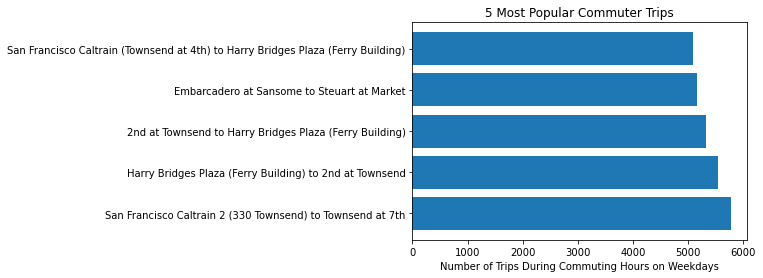

In [128]:
def plot_five_most_pop():
    x = five_most_pop_commuter_trips['trip_name']
    y = five_most_pop_commuter_trips['num_trips']
    plt.barh(x,y)
    plt.xlabel('Number of Trips During Commuting Hours on Weekdays')
    plt.title('5 Most Popular Commuter Trips')
    
plot_five_most_pop()

## **Offers**

1. A discount should be offered for customers/potential customers to use what I define as the "opportunity subset" of stations (74, 60, 50, 70, and 69) on weekends betwwen 7:00 am and 8:00 pm.  This is explained in the cells below

View:

    weekend_daytime_bikes_avail:
        
```sql
Select *
From(SELECT *, (bikes_available/(bikes_available + docks_available))*100 AS percent_of_bikes_present, EXTRACT(TIME FROM                     time) as clock_time, EXTRACT(YEAR FROM time) as year, EXTRACT(month FROM time) as month, EXTRACT(HOUR FROM time) AS hour, EXTRACT(DAYOFWEEK                  FROM time) as day_of_week
      FROM bike_trip_data.total_bikes
      WHERE bikes_available+docks_available > 0)
WHERE (percent_of_bikes_present > 80)
AND ((clock_time > '07:00:00') and (clock_time < '20:00:00') )
AND (day_of_week) in (1,7)

```

In [148]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM bike_trip_data.weekend_daytime_bikes_avail' > weekend_daytime_bikes_avail.csv


Waiting on bqjob_r63b5d55bde06b53e_00000174e7d9ed32_1 ... (15s) Current status: DONE   


In [149]:
weekend_daytime_stations_with_bikes_available = pd.read_csv('weekend_daytime_bikes_avail.csv')

In [150]:
weekend_daytime_stations_with_bikes_available['count']=1
weekend_daytime_stations_with_bikes_available.head(10)

,station_id,docks_available,bikes_available,time,total_bikes,percent_of_bikes_present,clock_time,year,month,hour,day_of_week,count
0,90,2,29,2016-08-27 07:23:01,31,93.548387,07:23:01,2016,8,7,7,1
1,90,2,29,2016-08-27 07:05:01,31,93.548387,07:05:01,2016,8,7,7,1
2,2,0,27,2015-03-08 14:01:02,27,100.000000,14:01:02,2015,3,14,1,1
3,2,0,27,2015-03-08 13:53:02,27,100.000000,13:53:02,2015,3,13,1,1
4,2,1,26,2015-03-08 15:27:02,27,96.296296,15:27:02,2015,3,15,1,1
5,2,1,26,2015-03-07 12:03:02,27,96.296296,12:03:02,2015,3,12,7,1
6,2,1,26,2015-03-08 16:12:02,27,96.296296,16:12:02,2015,3,16,1,1
7,2,1,26,2015-03-07 12:21:02,27,96.296296,12:21:02,2015,3,12,7,1
8,2,1,26,2015-03-07 12:10:03,27,96.296296,12:10:03,2015,3,12,7,1
9,2,1,26,2015-03-07 11:37:02,27,96.296296,11:37:02,2015,3,11,7,1


In [151]:
most_avail = weekend_daytime_stations_with_bikes_available.groupby(by = 'station_id').sum().sort_values('count', ascending = False).head(5)
most_avail

,docks_available,bikes_available,total_bikes,percent_of_bikes_present,year,month,hour,day_of_week,count
station_id,,,,,,,,,
74,110891,846844,957735,3.735814e+06,85117198,269162,548982,177750,42246
60,44863,515817,560680,3.450288e+06,75561901,246063,519974,154697,37505
50,89933,692910,782843,3.021951e+06,68793295,202671,434214,154116,34140
70,71508,567879,639387,3.029697e+06,68711049,251165,427010,128195,34103
69,72996,479592,552588,2.088145e+06,48477834,171108,318167,90210,24060


The series above shows the stations in order of how often they have over 80% of their bikes available during the daytime on the weekends. This will lead to an offer.

In [152]:
opportunities = most_avail.index
opportunities = [int(i) for i in opportunities]
opportunities

[74, 60, 50, 70, 69]

In [153]:
opps = weekend_daytime_stations_with_bikes_available[weekend_daytime_stations_with_bikes_available.station_id.isin(opportunities)]


View:

    weekend_daytime:
    
    This view shows all stations on the weekend between 7am and 8pm, and shows the percent of the station that is full
```sql
Select *
From(SELECT *, (bikes_available/(bikes_available + docks_available))*100 AS percent_of_bikes_present, EXTRACT(TIME FROM                     time) as clock_time, EXTRACT(YEAR FROM time) as year, EXTRACT(month FROM time) as month, EXTRACT(HOUR FROM time) AS hour, EXTRACT(DAYOFWEEK                  FROM time) as day_of_week
      FROM bike_trip_data.total_bikes
      WHERE bikes_available+docks_available > 0)
WHERE ((clock_time > '07:00:00') and (clock_time < '20:00:00') )
AND (day_of_week) in (1,7)

```

In [167]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 ' SELECT * FROM bike_trip_data.weekend_daytime ' >all_weekend_daytime.csv

Waiting on bqjob_r76118c63629d215f_00000174e7e67c60_1 ... (34s) Current status: DONE   


In [175]:
all_weekend_daytime = pd.read_csv('all_weekend_daytime.csv')

In [184]:
all_weekend_daytime.tail()

,station_id,docks_available,bikes_available,time,total_bikes,percent_of_bikes_present,clock_time,year,month,hour,day_of_week
999995,22,17,10,2014-09-20 12:38:02,27,37.037037,12:38:02,2014,9,12,7
999996,22,17,10,2015-09-13 15:18:02,27,37.037037,15:18:02,2015,9,15,1
999997,22,17,10,2014-06-15 18:01:03,27,37.037037,18:01:03,2014,6,18,1
999998,22,17,10,2013-09-28 11:45:02,27,37.037037,11:45:02,2013,9,11,7
999999,22,17,10,2014-03-29 07:30:02,27,37.037037,07:30:02,2014,3,7,7


The below dataframe shows, for all stations, the average percent of bikes present for each hour of the day on the weekend between 7am and 8pm

In [177]:
all_weekend_daytime[['percent_of_bikes_present','hour']].groupby('hour').mean()

,percent_of_bikes_present
hour,
7,47.724957
8,47.698567
9,47.436663
10,47.353526
11,46.851279
12,46.527551
13,46.425493
14,46.355598
15,46.243837


In [187]:
new_all_weekend_daytime = all_weekend_daytime[all_weekend_daytime.station_id.isin(opportunities)]

The below dataframe shows the average percent of bikes present for each hour of the day on the weekend between 7am and 8pm for the subset of stations identified earlier as business opportunities because of a higher percentage of unused bikes during these hours. 

In [188]:
new_all_weekend_daytime[['percent_of_bikes_present','hour']].groupby('hour').mean()

,percent_of_bikes_present
hour,
7,57.794220
8,58.191723
9,58.519945
10,58.871620
11,58.580981
12,57.722122
13,58.668107
14,59.438295
15,58.284322


Text(0.5, 0, 'Hour of the Day')

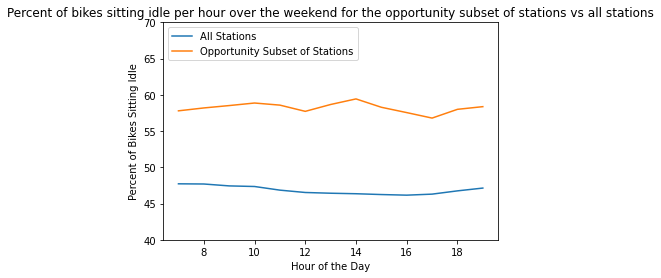

In [204]:
plt.plot(all_weekend_daytime[['percent_of_bikes_present','hour']].groupby('hour').mean(), label='All Stations')
plt.plot(new_all_weekend_daytime[['percent_of_bikes_present','hour']].groupby('hour').mean(), label='Opportunity Subset of Stations')
plt.legend(loc="upper left")
plt.ylim(40,70)
plt.title('Percent of bikes sitting idle per hour over the weekend for the opportunity subset of stations vs all stations')
plt.ylabel('Percent of Bikes Sitting Idle')
plt.xlabel('Hour of the Day')


As can be seen in the graph above, this opportunity subset of stations has a higher percentage of idle bikes during the day over the weekend than most stations.  We should therefore offer a discount during the weekend daytimes for the stations with ID numbers 74, 60, 50, 70, and 69.